In [23]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

In [24]:
def make_cdf(data):
    data_nonzero = data[np.nonzero(data)]
    x = np.sort(data_nonzero)
    f = np.arange(start=0, stop=np.size(data_nonzero), step=1)/float(np.size(data))
    return x, f


In [25]:
data_dir = "/home/trevor/boolean_network_data/limit_cycle_lengths/2023-02-10-09-44-05"
results = np.load(os.path.join(data_dir, "results.npy"), allow_pickle=True)
with open(os.path.join(data_dir, "meta.json"), 'r') as f:
    meta = json.load(f)

In [26]:
N_vals = meta["N"][:len(results)]
cycle_lengths_vs_N = [x[0] for x in results]
cycle_ends_vs_N = [x[1] for x in results]


In [27]:
medians = []
for n, result in zip(N_vals, cycle_lengths_vs_N):
    infd_results = result[np.nonzero(result)]
    medians.append(np.median(infd_results))


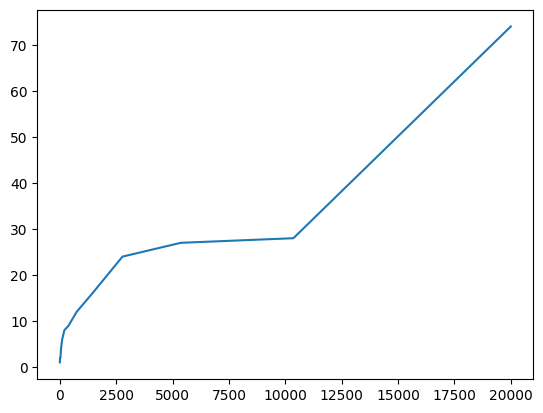

In [28]:
fig, axs = plt.subplots()
axs.plot(N_vals, medians)


Text(0, 0.5, 'CDF')

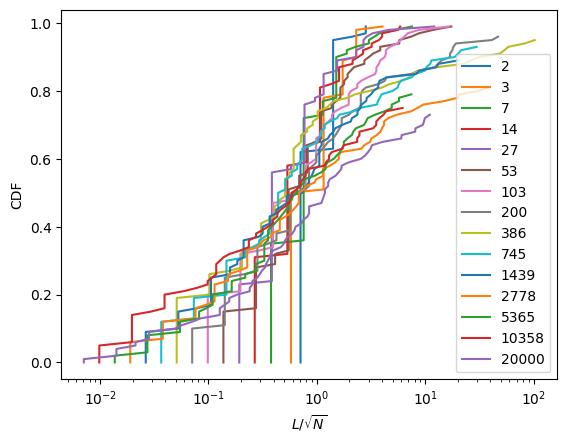

In [29]:
fig, axs = plt.subplots()
for i, (N, data) in enumerate(zip(N_vals, cycle_lengths_vs_N)):
    cdf_x, cdf_y = make_cdf(data)
    axs.plot(cdf_x/np.sqrt(N), cdf_y, label="{}".format(N))
axs.set_xscale("log")
axs.legend()
axs.set_xlabel(r"$L/\sqrt{N}$")
axs.set_ylabel("CDF")


Text(0, 0.5, 'Cycle Length')

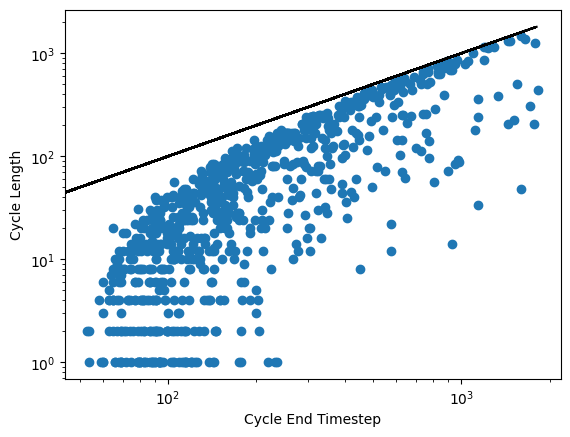

In [12]:
to_plot = -2
fig, axs = plt.subplots()
axs.scatter(cycle_ends_vs_N[to_plot][:, 1], cycle_lengths_vs_N[to_plot])
axs.plot(cycle_ends_vs_N[to_plot][:, 1], cycle_ends_vs_N[to_plot][:, 1], color="black", linestyle="--")
axs.set_xscale("log")
axs.set_yscale("log")
axs.set_xlabel("Cycle End Timestep")
axs.set_ylabel("Cycle Length")
